In [5]:
#imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [8]:
# define paths
train_dir = "dataset/training_set"
test_dir = "dataset/testing_set"

In [12]:
# use ImageDataGenerator to load and preprocess
datagen = ImageDataGenerator(
    rescale=1./255,         # normalize pixel values
    rotation_range=20,      # small rotations
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # resize all images
    batch_size=32,
    class_mode="binary"      # benign vs malignant
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary"
)

Found 1112 images belonging to 2 classes.
Found 1112 images belonging to 2 classes.


In [13]:
#  build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [14]:
# train
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.6915 - loss: 0.6684 - val_accuracy: 0.7122 - val_loss: 0.5937
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.7140 - loss: 0.5734 - val_accuracy: 0.7329 - val_loss: 0.5438
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7275 - loss: 0.5558 - val_accuracy: 0.7194 - val_loss: 0.5694
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.7392 - loss: 0.5333 - val_accuracy: 0.7464 - val_loss: 0.5270
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7347 - loss: 0.5466 - val_accuracy: 0.7437 - val_loss: 0.5248
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.7473 - loss: 0.5324 - val_accuracy: 0.7563 - val_loss: 0.5109
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.7626 - loss: 0.5028 - val_accuracy: 0.7779 - val_loss: 0.4623
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7599 - loss: 0.4936 - val_accuracy: 0.7797 - val_loss:

35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 468ms/step - accuracy: 0.8058 - loss: 0.4224
Test Accuracy: 80.58%


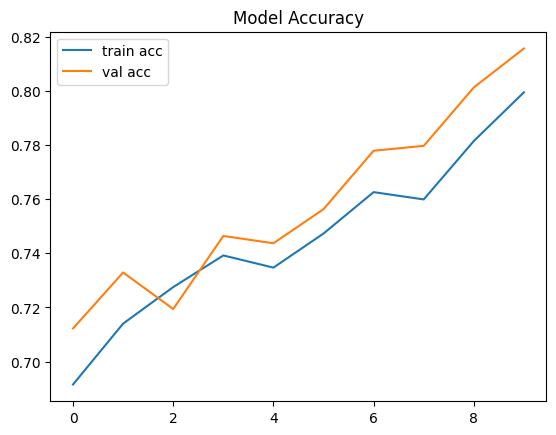

In [15]:
# evaluate
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Model Accuracy')
plt.show()


In [16]:
# save model
model.save("../models/breast_cancer_classifier.h5")
